# [실습 순서]
1. 파일로부터 DataFrame 생성
1. Viewing Data
1. Cleaning Data
1. Finding Relationships (Correlation, Plotting)

# 1. 파일로부터 DataFrame 생성

## 1-1. CSV(Comma Seperated Value) 파일 : DataFrame = Pandas.**read_csv**(*filename*)

In [ ]:
import pandas as pd

df_data = pd.read_csv('data.csv')
df_data

## 1-2. JSON 파일 :  : DataFrame = Pandas.**read_json**(*filename*)
* JSON 포맷은 파이썬의 Dictionary와 같은 구조로 파일이 없는 경우, dictionary에 저장하여 바로 loading 가능함

In [ ]:
df_json = pd.read_json('data.json')
df_json

# 2. Viewing Data
  * **to_string()** : string으로 변환하여 전체 데이터 확인하기
  * **head**(*num_row*) : *num_row* = 5
  * **tail**(*num_row*) : *num_row* = 5
  * **info**() : null값 상황 확인
  * *pandas*.**options.display.max_rows** : 한번에 출력가능한 maximum row의 수
 

## 2-1. String으로 전체 데이터 확인해 보기 : *dataframe*.to_string()

In [ ]:
df_data.to_string()

* DataFrame의 전체 row를 출력하도록 설정 : *pandas*.**options.display.max_rows**

In [ ]:
pd.options.display.max_rows

In [ ]:
pd.options.display.max_rows = 9999
df_data

## 2-2. 시작 및 마지막 데이터 확인 : head, tail

In [ ]:
df_data.head()

In [ ]:
df_data.tail()

## 2-3. 전체적 정보 및 null값 항목 확인 : info

In [ ]:
df_data.info()

## 2-4. 지정된 범위의 데이터 접근 : loc, iloc

In [ ]:
df_data.loc[:,['Calories']]

#### [index label이 있는 경우]

In [ ]:
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}
df_temp = pd.DataFrame(data,index=['day1', 'day2', 'day3'])
df_temp

In [ ]:
df_temp.loc['day1']

In [ ]:
df_temp.loc['day1':'day3']

# 2. Cleaning Data
  - Empty Cells
  - Data in wrong format
  - Wrong data
  - Duplicates

## 2-1. Cleaning Empty Cells (null, NaN)
  - Null값이 있는 row 삭제 : 
  - Empty Values를 새로운 값으로 채우기 : Mean, Median, Mode 등

### 2-1-1.  Null값이 있는 Row 삭제 : dropna
  * *dataframe*.**dropna**(axis, how, thresh, subset, inplace)
    - inplace = False
    - subset = *List* (지정 된 범위에 null이 있을 경우 Row 삭제)

In [ ]:
df_data = pd.read_csv('data_d.csv')
df_data_backup = df_data.copy()
df_data.dropna(inplace=True)
df_data

### 2-1-2. 새로운 값으로 채우기 : fillna
* *dataframe*.**fillna**(**value**, method, axis, inplace, limit, downcast)
    * inplace = False
    * 특정 컬럼에 해당하는 값만 채우려는 경우 : DataFrame **[** *name* **]**.**fillna**(...)

In [ ]:
df_data = df_data_backup.copy()
df_data

In [ ]:
df_data.fillna(240.0, inplace=True)
df_data.loc[28]

* mean, median, mode 값으로 채우기
    - Mean - The average value
    - Median - The mid point value
    - Mode - The most common value -> index 0에 최빈값을 갖는 DataFrame 반환

In [ ]:
df_data = df_data_backup.copy()
df_data.info()

In [ ]:
df_data = df_data_backup.copy()
new_value = df_data['Calories'].mean()
print(new_value)
df_data['Calories'].fillna(new_value, inplace=True)
print(df_data)

In [ ]:
df_data = df_data_backup.copy()
new_value = df_data['Calories'].mode()[0] # mode의 index[0]
print(new_value)
df_data['Calories'].fillna(new_value, inplace=True)
print(df_data)

## 2-2. Cleaning Wrong Format
* Correct Format으로 변환
* 해당 Row 삭제

#### Date Format 통일하기
* *pandas*.**to_datetime**(*dataframe*)

In [ ]:
df_data['Date'] = pd.to_datetime(df_data['Date'])
df_data

#### Date 값이 null인 Row 삭제

In [ ]:
df_data.dropna(subset=['Data'], )

## 2-3. Cleaning Wrong Data
* small data : 눈으로 확인하고 수정하기
* 규칙을 정해서 수정하기
* 해당 row 삭제하기

#### 눈으로 확인 후 수정하기

In [ ]:
df_data = pd.read_csv('data.csv')
pd.options.display.max_rows = 9999
df_data

In [ ]:
df_data.loc[17,'Calories'] = 320.5
df_data.loc[17]

#### 규칙을 정해서 수정하기

* Maxpluse의 값이 120미만인 데이터는 120으로 변경

In [ ]:
for idx in df_data.index:
    if df_data.loc[idx,' Maxpulse'] < 120:
        df_data.loc[idx,' Maxpulse'] = 120
df_data

#### 해당 Row 삭제

In [ ]:
for idx in df_data.index:
    if df_data.loc[idx,' Maxpulse'] < 120:
        df_data.drop(idx, inplace=True)
df_data

## 2-4. Removing Duplicates
1. 중복값(duplicated values)확인 : *dataframe*.**duplicated**(subset, keep)
1. 중복값 삭제 : "dataframe".**drop_duplicates**

In [ ]:
df_data.drop_duplicates(inplace=True)
df_data.duplicated

# 3. Finding Relationship
## 3-1. Correlation
* *dataframe*.**corr**(method, min_periods)
  - Pefect, Good, Bad relationship

In [4]:
import pandas as pd
df_data = pd.read_csv('data.csv')
# Empty Cells
df_data.dropna(inplace=True)


In [5]:
# Data in wrong format

Index(['Duration', 'Pulse', 'Maxpulse', 'Calories'], dtype='object')

In [7]:
# Wrong data
pd.options.display.max_rows=9999
df_data

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [9]:
# Duplicates
df_data.duplicated()
df_data.drop_duplicates(inplace=True)

In [10]:
df_data.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
39     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
72     False
73     False
74     False
75     False
76     False
77     False
78     False
79     False
80     False
81     False
82     False
83     False

In [12]:
df_data.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.167770,-0.000501,0.923053
Pulse,-0.167770,1.000000,0.784994,0.015301
Maxpulse,-0.000501,0.784994,1.000000,0.195309
Calories,0.923053,0.015301,0.195309,1.000000


## 3-2. Plotting
* *DataFrame*.**plot**(kind=*type*, x=*x-value*, y=*y-value*)

<Axes: >

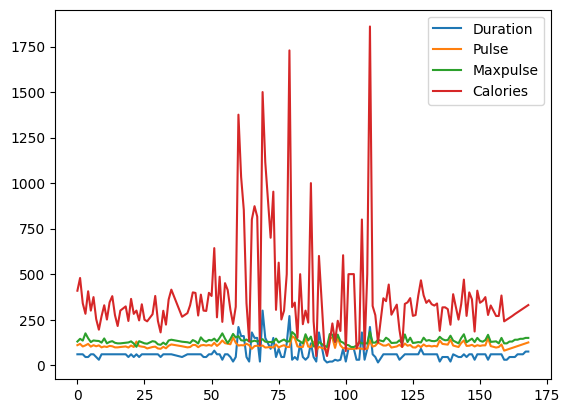

In [11]:
df_data.plot()

* Scatter : Duration - Calories, Duration - Pulse, Duration - Maxpulse

<Axes: xlabel='Duration', ylabel='Calories'>

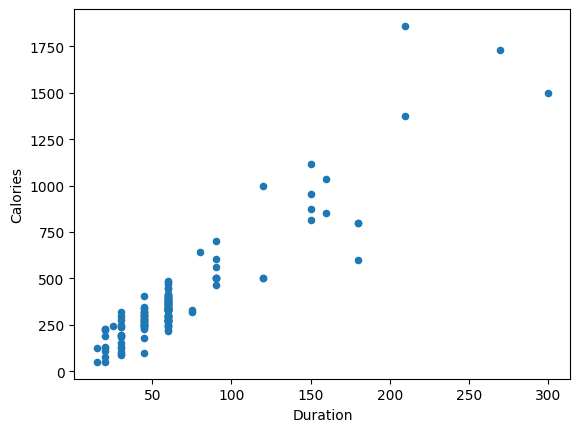

In [14]:
df_data.plot(kind='scatter', x='Duration', y='Calories')

<Axes: xlabel='Duration', ylabel='Pulse'>

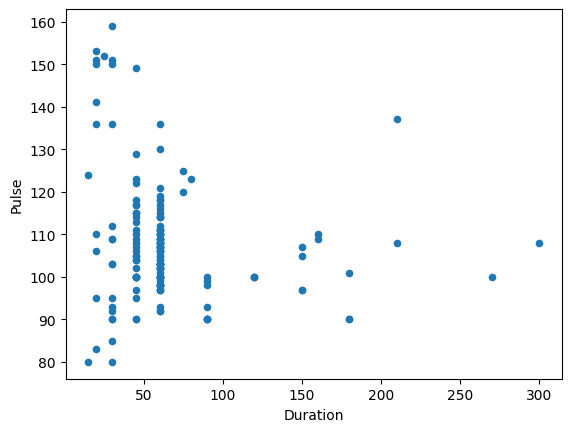

In [15]:
df_data.plot(kind='scatter', x='Duration', y='Pulse')

* Histogram for 'Duration'

In [19]:
df_data['Duration'].plot(kind='Histogram')

ValueError: Histogram is not a valid plot kind